<a href="https://colab.research.google.com/github/priyentech/COMPUTER_VISION/blob/main/IMAGE_CLASSIFICATION_CAT_OR_DOG_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, Dense, Flatten,Dropout

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
X_train = np.loadtxt('/content/drive/MyDrive/input.csv', delimiter=',')
Y_train = np.loadtxt('/content/drive/MyDrive/labels.csv', delimiter=',')
X_test = np.loadtxt('/content/drive/MyDrive/input_test.csv', delimiter=',')
Y_test = np.loadtxt('/content/drive/MyDrive/labels_test.csv', delimiter=',')

In [5]:
from re import X
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)
X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

X_train = X_train/255.0
X_test = X_test/255.0



In [6]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


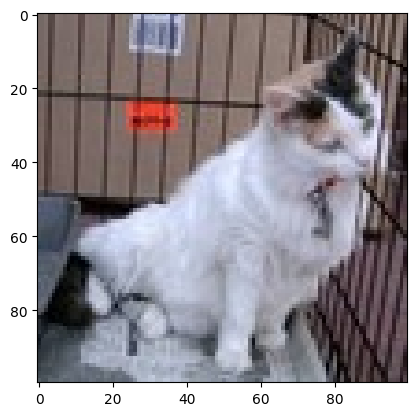

In [7]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

In [8]:
model = Sequential()
model.add(Conv2D(32, (3, 3),  activation = 'relu', input_shape = (100, 100, 3)))
model.add(MaxPooling2D( (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D( (2, 2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [10]:
model.fit(X_train, Y_train, epochs = 20, batch_size = 64, validation_split= 0.2)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 28s 995ms/step - accuracy: 0.5729 - loss: 1.2879 - val_accuracy: 0.0000e+00 - val_loss: 0.6961
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 40s 966ms/step - accuracy: 0.6425 - loss: 0.6738 - val_accuracy: 0.0000e+00 - val_loss: 0.7389
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.6154 - loss: 0.6645 - val_accuracy: 0.0000e+00 - val_loss: 0.7888
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 40s 962ms/step - accuracy: 0.6311 - loss: 0.6471 - val_accuracy: 0.0000e+00 - val_loss: 0.7979
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.6247 - loss: 0.6330 - val_accuracy: 0.0000e+00 - val_loss: 0.7622
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 40s 977ms/step - accuracy: 0.6267 - loss: 0.6249 - val_accuracy: 0.0125 - val_loss: 0.9345
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.6424 - loss: 0.5893 - val_accuracy: 0.2300 - val_loss: 0.9489
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.6754 - loss: 0.5592 - 

In [11]:
model.evaluate(X_test, Y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 116ms/step - accuracy: 0.7326 - loss: 0.5968


[0.728406548500061, 0.6899999976158142]

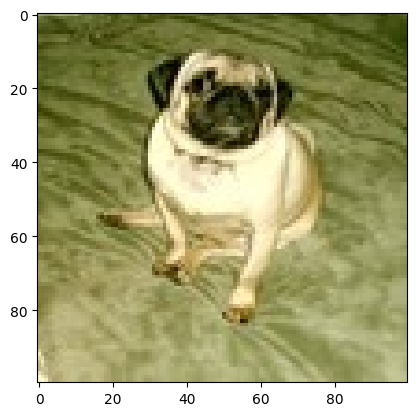

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
 OUR MODEL SAYS , IT IS DOG


In [12]:
idx2 = random.randint(0, len(Y_test)-1)
plt.imshow(X_test[idx2])
plt.show()
y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred >0.5

if(y_pred == 0):
  print(" OUR MODEL SAYS , IT IS DOG")
else:
  print(" OUR MODEL SAYS , IT IS CAT")